# Initial analysis

A first look at the received data from CBS


### Initialization
Initialization of the libraries and csv or excel data files

In [1]:
import urllib.request as urllib, os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'Coosto_berichten.csv'
datafolder = 'data/'

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

data = pd.read_csv('data/' + filename, delimiter=';')

### Cleaning
After the initialization a cleaning and possibly enriching process will be performed to make the data usable. 

In [2]:
def count_missing(x):
  return sum(x.isnull())
print("Missing values per column:")
print(data.apply(count_missing, axis=0))

Missing values per column:
Unnamed: 0             0
Unnamed: 0.1           0
Unnamed: 0.1.1         0
datum                  0
url                    0
sentiment              0
discussielengte        0
views                  0
auteur                 0
GPS breedtegraad    3837
GPS lengtegraad     3837
bericht tekst         17
likes count            0
datum utc              0
hashtags               0
dtype: int64


### Pie chart

<<explanation>>

Neutral:  5242
Positive:  3045
Negative:  150


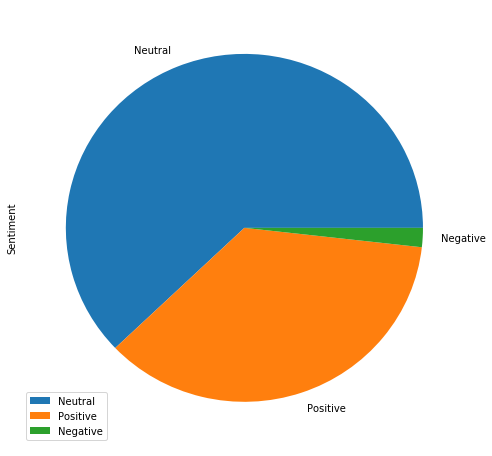

In [6]:
# Sentiment neutral
print('Neutral: ', len(data.loc[data['sentiment']=='0']))

# Sentiment positive
print('Positive: ', len(data.loc[data['sentiment'] == '+']))

# Sentiment negative
print('Negative: ', len(data.loc[data['sentiment'] == '-']))

# Pie chart
pd.DataFrame({'Sentiment': [len(data.loc[data['sentiment'] == '0']), 
                          len(data.loc[data['sentiment'] == '+']),
                          len(data.loc[data['sentiment'] == '-'])]}, index=['Neutral', 'Positive', 'Negative']).plot.pie(y='Sentiment', figsize=(8,8))



### Comments vs post

In [7]:
# Pie chart
#pd.DataFrame({'Type': [len(data.loc[data['type'] == 'post']),
                          #len(data.loc[data['type'] == 'comment'])]}, index=['Post', 'Comment']).plot.pie(y='Type', figsize=(8,8))


### Bar chart

<<explanation>>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234CE62BBE0>,
      dtype=object)

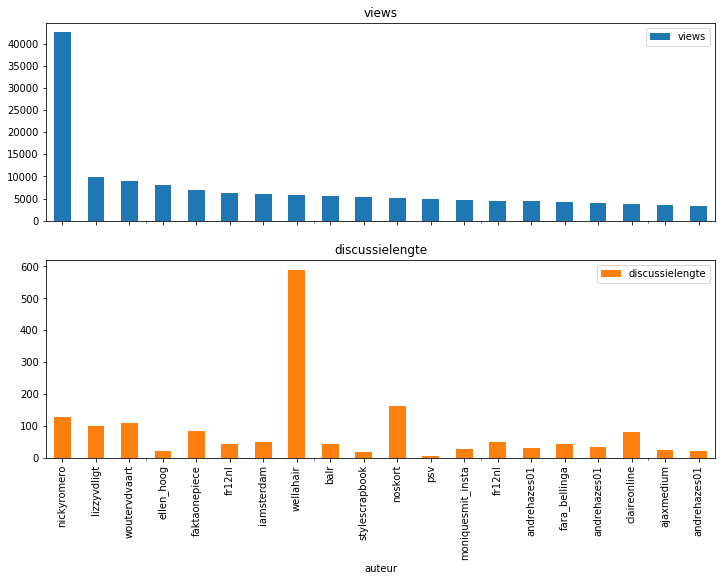

In [8]:
data.sort_values(by='views', ascending=False).head(10)

data.sort_values(by='views', ascending=False).head(20)\
    .plot.bar(x='auteur', y=['views', 'discussielengte'], rot=90, subplots=True, figsize=(12,8))

### Scatter chart

<>

Within The Netherlands: 4422 of 8437


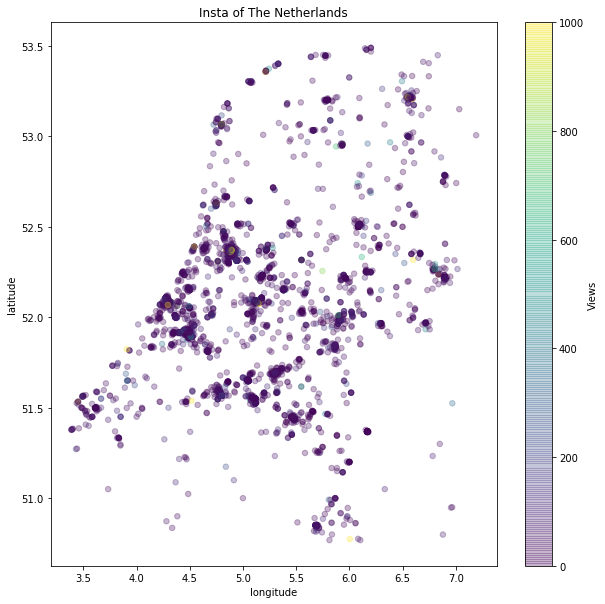

In [18]:
data_gps = data
data_gps = data_gps.loc[3.2 <= data_gps['GPS lengtegraad']]
data_gps = data_gps.loc[7.4 >= data_gps['GPS lengtegraad']]
data_gps = data_gps.loc[50.7 <= data_gps['GPS breedtegraad']]
data_gps = data_gps.loc[53.6 >= data_gps['GPS breedtegraad']]

plt.figure(figsize=[10,10]);

plt.title('Insta of The Netherlands')
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.xlim(3.2,7.4)
#plt.ylim(50.7,53.6)
sizes = 120

print('Within The Netherlands:', len(data_gps), 'of', len(data))

points=plt.scatter(data_gps['GPS lengtegraad'], data_gps['GPS breedtegraad'], marker='.'
                   , c=data_gps.views
                   , s=sizes**1
                   , alpha=0.3
                   , cmap='viridis')

plt.clim(0,1000)

plt.colorbar(label='Views');

In [11]:
# Under construction because of the cleaning

# plt.figure(figsize=[10,10]);

# plt.title('Views vs discussion')
# plt.xlabel('views')
# plt.ylabel('discussionlength')
# #plt.xlim(3.2,7.4)
# #plt.ylim(50.7,53.6)
# sizes = 120

# points=plt.scatter(data['views'], data_gps['discussielengte'], marker='.'
#                    , s=sizes**1
#                    , alpha=0.3
#                    , cmap='binary')

# plt.clim(0,1000)

## Area chart

<<explanation>>

## Line chart

<<explanation>>

Text(0,0.5,'Number of posts')

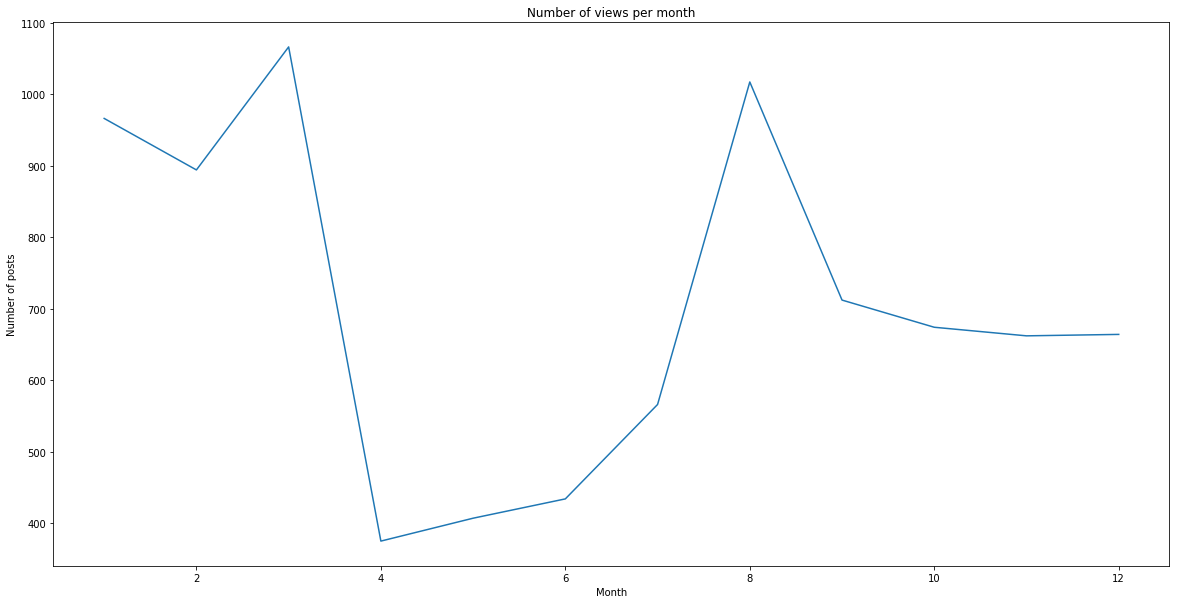

In [20]:
# Step 1: Convert to datetime
data['datum'] = pd.to_datetime(data['datum'], errors='coerce')
# Step 2: Make extra column with month number
data['Month'] = data['datum'].dt.month

data['Month'].value_counts().sort_index().plot(title='Number of views per month', \
                                               figsize=(20,10))
plt.xlabel('Month')
plt.ylabel('Number of posts')

## Scatter matrix

<<explanation>>

## Histogram

<<explanation>>

We're gonna start with seeing how many times someone posts more than once. So this means that for example there could be three people who have posted 8 times. This would be represented as 8 -- 3

In [21]:
data.head(10)
x = data['auteur'].value_counts()
x.value_counts().sort_index()

# Plotting is not useful yet, more data needed
# plt.hist(x)
# plt.show()

1    7165
2     400
3      86
4      21
5      15
6       4
7       2
8       1
9       1
Name: auteur, dtype: int64

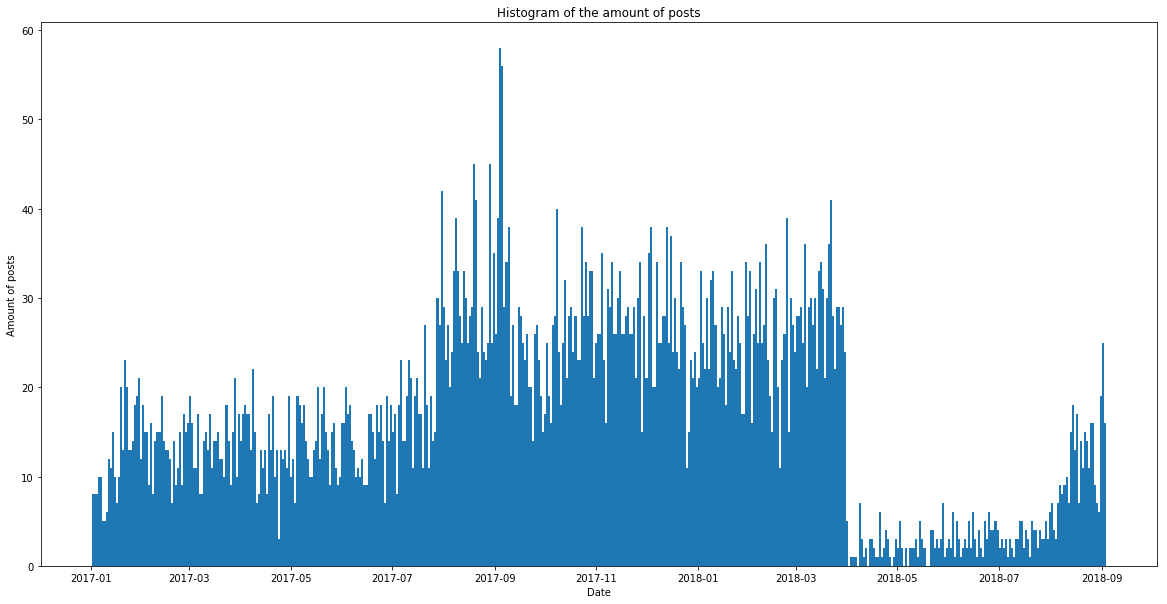

In [22]:
data['datum'] = data['datum'].astype("datetime64")

fig = plt.figure(figsize=(20,10))

bins = 500
plt.hist(data['datum'], bins=bins)

plt.xlabel('Date')
plt.ylabel('Amount of posts')
plt.title('Histogram of the amount of posts')
plt.show()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,datum,url,sentiment,discussielengte,views,auteur,GPS breedtegraad,GPS lengtegraad,bericht tekst,likes count,datum utc,hashtags
0,0,0,0,2018-03-29 14:45,https://instagram.com/p/Bg6FiptlWhz/,0,0.0,33.0,sizezeroalkmaar,52.629131,4.749720,"Je hebt het druk, maar wilt toch graag aan je ...",33.0,2018-03-29 12:45:14,"['salon', 'alkmaar', 'sizezero', 'shape', 'fit..."
1,1,1,1,2018-01-01 13:52,https://instagram.com/p/BdaFBieFJ8X/,0,0.0,31.0,estherfeenstra,53.303810,5.052010,Gelukkig nieuwjaar!,31.0,2018-01-01 12:52:05,"['bikkels', 'zijlieverdanik', 'unox', 'happyne..."
2,2,2,2,2018-02-28 13:15,https://instagram.com/p/BfvXGkyhiSf/,0,1.0,11.0,someguyslivinginahouse,51.916698,4.500000,Wandering around Rotterdam with the housemates...,11.0,2018-02-28 12:15:39,"['coliving', 'sharedliving', 'sharedhouse', 's..."
3,3,3,3,2017-10-19 19:15,https://instagram.com/p/BacAeTuAyyi/,0,0.0,12.0,skinpractica,NaN,NaN,Skinpractica voor al uw huid en laserbehandeli...,12.0,2017-10-19 17:15:22,"['Skinpractica', 'Rotterdam', 'LaanopZuid145',..."
4,4,4,4,2017-09-02 11:17,https://instagram.com/p/BYiIer7laoM/,0,0.0,34.0,susannetendoesschate,51.986523,5.834437,Deze toppers van @2gettherecoaching lopen vand...,34.0,2017-09-02 09:17:59,"['airborne', 'airbornewandeltocht', 'lopen', '..."
5,5,5,5,2017-11-17 08:36,https://instagram.com/p/BblpQI3FAYh/,0,0.0,35.0,atelieranitadegroot,51.916698,4.400000,The most wonderful time of the year can’t wai...,35.0,2017-11-17 07:36:15,"['atelieranitadegroot', 'schiedam']"
6,6,6,6,2017-01-25 07:32,https://instagram.com/p/BPrWrQVAtLP/,0,0.0,113.0,eftelmagic,NaN,NaN,// Fakir // . . . // @efteling //,113.0,2017-01-25 06:32:39,"['Efteling', 'Fakir', 'Sprookjesbos', 'Fairyta..."
7,7,7,7,2017-05-10 17:24,https://instagram.com/p/BT6rCQRAgb5/,0,2.0,43.0,adventureofastone,NaN,NaN,Spring bouquet,43.0,2017-05-10 15:24:44,"['spring', 'lente', 'bouquet', 'boeket', 'flow..."
8,8,8,8,2018-01-05 19:27,https://instagram.com/p/Bdk-v8KleGR/,0,81.0,788.0,nikiellena,51.918327,4.479324,"One of my favorite hotspots in Rotterdam, I am...",788.0,2018-01-05 18:27:39,"['hotspot', 'hotspotrotterdam', 'sappi', 'sapp..."
9,9,9,9,2017-11-23 19:28,https://instagram.com/p/Bb2QrKmFZFI/,+,1.0,28.0,foreveryoungdelft,52.011902,4.357050,Black Friday bij Forever Young: dat betekent 2...,28.0,2017-11-23 18:28:35,"['delft', 'shoppen', 'fashion', 'blackfriday']"
